# Welcome to My Human Resources Insights project

In [1]:
import pandas as pd
import pandas_profiling
import pandas.io
import cufflinks as cf
from lifelines import KaplanMeierFitter
import chart_studio.plotly as py
cf.go_offline()
import datetime
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Data Ingestion

In [2]:
hr = pd.read_csv('HR.csv')

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
Employee_Name                 310 non-null object
EmpID                         310 non-null float64
MarriedID                     310 non-null float64
MaritalStatusID               310 non-null float64
GenderID                      310 non-null float64
EmpStatusID                   310 non-null float64
DeptID                        310 non-null float64
PerfScoreID                   310 non-null float64
FromDiversityJobFairID        310 non-null float64
PayRate                       310 non-null float64
Termd                         310 non-null float64
PositionID                    310 non-null float64
Position                      310 non-null object
State                         310 non-null object
Zip                           310 non-null float64
DOB                           310 non-null object
Sex                           310 non-null object
MaritalDesc                   310

In [4]:
hr.head()

Employee_Name         EmpID  MarriedID  MaritalStatusID  GenderID  \
0            Brown, Mia  1.103024e+09        1.0              1.0       0.0   
1  LaRotonda, William    1.106027e+09        0.0              2.0       1.0   
2      Steans, Tyrone    1.302053e+09        0.0              0.0       1.0   
3       Howard, Estelle  1.211051e+09        1.0              1.0       0.0   
4           Singh, Nan   1.307060e+09        0.0              0.0       0.0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  PayRate  ...  \
0          1.0     1.0          3.0                     1.0    28.50  ...   
1          1.0     1.0          3.0                     0.0    23.00  ...   
2          1.0     1.0          3.0                     0.0    29.00  ...   
3          1.0     1.0          3.0                     0.0    21.50  ...   
4          1.0     1.0          3.0                     0.0    16.56  ...   

      Department         ManagerName ManagerID       RecruitmentSource  \
0  Admin Offices  Brandon R. LeBlanc       1.0      Diversity Job Fair   
1  Admin Offices  Brandon R. LeBlanc       1.0      Website Banner Ads   
2  Admin Offices  Brandon R. LeBlanc       1.0         Internet Search   
3  Admin Offices  Brandon R. LeBlanc       1.0  Pay Per Click - Google   
4  Admin Offices  Brandon R. LeBlanc       1.0      Website Banner Ads   

   PerformanceScore EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0       Fully Meets             2.04             2.0                  6.0   
1       Fully Meets             5.00             4.0                  4.0   
2       Fully Meets             3.90             5.0                  5.0   
3       Fully Meets             3.24             3.0                  4.0   
4       Fully Meets             5.00             3.0                  5.0   

  LastPerformanceReview_Date DaysLateLast30  
0                  1/15/2019            0.0  
1                  1/17/2019            0.0  
2                  1/18/2019            0.0  
3                        NaN            NaN  
4                  1/15/2019            0.0  

[5 rows x 35 columns]

# Data Overview

In [5]:
pandas_profiling.ProfileReport(hr, correlations={"cramers": False})

# Data Wrangling & Cleaning

In [6]:
#The last 91 lines of the dataset seem contain nan values. Let's check it!
hr.tail(91).isna().count()

Employee_Name                 91
EmpID                         91
MarriedID                     91
MaritalStatusID               91
GenderID                      91
EmpStatusID                   91
DeptID                        91
PerfScoreID                   91
FromDiversityJobFairID        91
PayRate                       91
Termd                         91
PositionID                    91
Position                      91
State                         91
Zip                           91
DOB                           91
Sex                           91
MaritalDesc                   91
CitizenDesc                   91
HispanicLatino                91
RaceDesc                      91
DateofHire                    91
DateofTermination             91
TermReason                    91
EmploymentStatus              91
Department                    91
ManagerName                   91
ManagerID                     91
RecruitmentSource             91
PerformanceScore              91
Engagement

In [7]:
# I drop all these nan values rows.
hr.dropna(how='all', inplace=True)

In [8]:
# I get the columns/features names
hr.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [9]:
# I change the type of columns from float to object where values are code 
for col in ['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID','PositionID', 'ManagerID', 'Zip']:
    hr[col] = hr[col].astype('object')

In [10]:
# I replace ID by CODE of column names with code values
hr.columns = hr.columns.str.replace('ID','CODE')

In [11]:
# I get the type of features
hr.dtypes

Employee_Name                  object
EmpCODE                        object
MarriedCODE                    object
MaritalStatusCODE              object
GenderCODE                     object
EmpStatusCODE                  object
DeptCODE                       object
PerfScoreCODE                  object
FromDiversityJobFairCODE       object
PayRate                       float64
Termd                         float64
PositionCODE                   object
Position                       object
State                          object
Zip                            object
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

In [12]:
#I look at the Position feature values
hr.Position.value_counts()

Production Technician I         136
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                 9
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Network Engineer                  5
Database Administrator            5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. Accountant                    2
Sr. DBA                           2
IT Manager - DB                   2
Shared Services Manager           2
Software Engineering Manager      1
IT Manager - Infra                1
Data Architect                    1
CIO                               1
BI Director                       1
Data Analyst                      1
IT Director                       1
IT Manager - Support              1
Director of Sales           

In [13]:
# I clean some values with typing errors
hr['Position'] = hr['Position'].str.replace('Data Analyst ','Data Analyst')

In [ ]:
#hr[hr.Position == 'Data Analyst']['PayRate'].value_counts()

In [ ]:
#hr[hr.Position == 'Data Analyst']['PayRate'].mean()

In [14]:
# I look at the Department feature values
hr.Department.unique()

array(['Admin Offices', 'Sales', 'IT/IS', 'Production       ',
       'Executive Office', 'Software Engineering'], dtype=object)

In [15]:
# I delete all non needed spaces in values with
hr['Department'] = hr['Department'].str.replace('Production       ','Production')

In [16]:
# To respect the anonymity, I delete the Employee_Name & ManagerName features
hr.drop(columns =['Employee_Name','ManagerName'], inplace=True)

In [17]:
# It seems that the Termd feature is highly correlated to EmpStatusID feature
# First, I look at the values in both of them
print("The Termd values are : \n", hr.Termd.values)
print("The EmpStatusCODE values are : \n", hr.EmpStatusCODE.values)

The Termd values are : 
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
The EmpStatusCODE values are : 

In [18]:
# I decide to drop the Termd feature as the EmpStatusID gathers more complete information 
hr.drop(columns = 'Termd', inplace = True)

In [19]:
# I look at the date columns 
print('Dates of birth of employees are \n', hr.DOB.values)
print('Dates of hiring of employees are \n', hr.DateofHire.values)
print('Dates of termination are \n', hr.DateofTermination.values)

Dates of birth of employees are 
 ['11/24/87' '04/26/84' '09/01/86' '09/16/85' '05/19/88' '06/14/87'
 '06/01/64' '05/15/63' '05/14/87' '09/14/88' '02/24/69' '07/10/71'
 '10/12/54' '02/09/69' '12/27/88' '11/02/75' '05/19/82' '05/12/89'
 '05/23/91' '07/11/89' '07/07/75' '11/08/88' '08/28/63' '09/22/89'
 '05/09/74' '11/27/79' '06/11/70' '07/01/84' '03/31/89' '05/11/90'
 '08/29/88' '01/15/68' '05/07/65' '05/12/80' '09/04/83' '10/24/87'
 '06/30/89' '02/09/72' '08/30/79' '11/21/72' '04/04/86' '10/23/71'
 '08/07/86' '02/21/84' '11/07/86' '07/04/88' '09/05/84' '09/16/84'
 '10/11/81' '08/26/86' '12/17/87' '02/08/70' '02/24/79' '03/19/83'
 '03/17/66' '07/05/80' '04/05/73' '01/04/64' '10/05/86' '07/09/70'
 '09/05/85' '07/06/68' '10/05/88' '03/12/73' '01/07/88' '11/24/89'
 '07/18/88' '04/16/81' '06/18/87' '04/04/79' '04/14/81' '05/05/88'
 '03/31/69' '09/21/54' '10/10/68' '03/10/70' '08/09/83' '11/28/73'
 '07/11/81' '07/01/72' '11/15/76' '10/26/81' '08/10/81' '05/09/77'
 '09/30/75' '12/17/75' '03/2

In [20]:
#For dates of birth, I create a function to add '19' before the year and obtain 4 digits regarding the year of birth
def add_nineteen(date):
    return date[0:6] + str(19) + date[6:8]

In [21]:
# I modify them in the right datetime format type
from datetime import datetime
hr['DOB'] = hr['DOB'].apply(add_nineteen)
hr['DOB'] = pd.to_datetime(hr['DOB'], format='%m/%d/%Y') 
hr['DateofHire'] = pd.to_datetime(hr['DateofHire']) 
hr['DateofTermination'] = pd.to_datetime(hr['DateofTermination'], format='%m/%d/%y') 
hr['LastPerformanceReview_Date'] = pd.to_datetime(hr['LastPerformanceReview_Date'])

In [22]:
hr.dtypes

EmpCODE                               object
MarriedCODE                           object
MaritalStatusCODE                     object
GenderCODE                            object
EmpStatusCODE                         object
DeptCODE                              object
PerfScoreCODE                         object
FromDiversityJobFairCODE              object
PayRate                              float64
PositionCODE                          object
Position                              object
State                                 object
Zip                                   object
DOB                           datetime64[ns]
Sex                                   object
MaritalDesc                           object
CitizenDesc                           object
HispanicLatino                        object
RaceDesc                              object
DateofHire                    datetime64[ns]
DateofTermination             datetime64[ns]
TermReason                            object
Employment

In [ ]:
#hr.DOB[305].year

In [23]:
# I look at the DaysLateLast30 feature values
hr.DaysLateLast30.value_counts()

0.0    207
Name: DaysLateLast30, dtype: int64

In [24]:
# In the DaysLateLast30 feature, 207 values are 0 and the others are missing, so I decide to delete it
hr.drop(columns='DaysLateLast30', inplace=True)

In [25]:
# I focus on ethnic origin features
print(hr.HispanicLatino.value_counts())
print('')
print(hr.RaceDesc.value_counts())

No     281
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

White                               193
Black or African American            57
Asian                                34
Two or more races                    18
Hispanic                              4
American Indian or Alaska Native      4
Name: RaceDesc, dtype: int64


In [26]:
# I decide to delete the HispanicLatino feature as the RaceDesc one gathers all ethnic origins
hr.drop(columns='HispanicLatino', inplace=True)

In [27]:
# I modify some values in the RaceDesc feature
hr['RaceDesc'] = hr['RaceDesc'].str.replace('Two or more races','Mixed')
hr['RaceDesc'] = hr['RaceDesc'].str.replace('American Indian or Alaska Native','American/Alaska natives')
print(hr.RaceDesc.unique())

['Black or African American' 'White' 'Asian' 'American/Alaska natives'
 'Mixed' 'Hispanic']


# Data Exploration, Analysis & Visualization

In [28]:
hr.describe()

PayRate  EngagementSurvey  EmpSatisfaction  SpecialProjectsCount
count  310.000000        310.000000       310.000000            310.000000
mean    31.284806          3.332097         3.890323              1.209677
std     15.383615          1.290590         0.910690              2.352009
min     14.000000          1.030000         1.000000              0.000000
25%     20.000000          2.082500         3.000000              0.000000
50%     24.000000          3.470000         4.000000              0.000000
75%     45.315000          4.520000         5.000000              0.000000
max     80.000000          5.000000         5.000000              8.000000

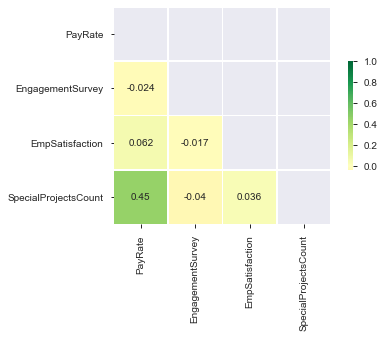

In [29]:
corr = hr.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 4))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='RdYlGn', vmax=1, center=0, annot = True,
           square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
# We can see that the only correlation interesting to deep dive is between Special Projects Count and Pay rate

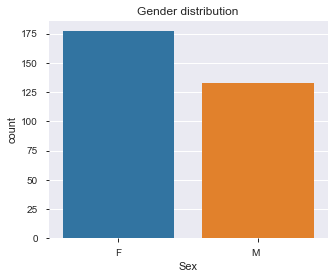

In [30]:
# What is the overall diversity profile of the organization?
plt.rcParams['figure.figsize'] = (5,4)
sns.countplot(x='Sex', data=hr).set_title('Gender distribution');

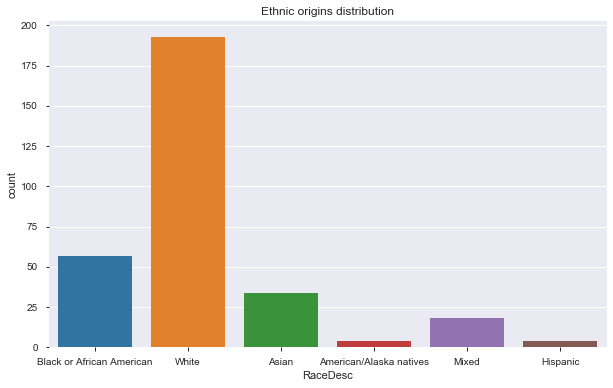

In [31]:
plt.rcParams['figure.figsize'] = (10,6)
sns.countplot(x='RaceDesc', data=hr).set_title('Ethnic origins distribution');

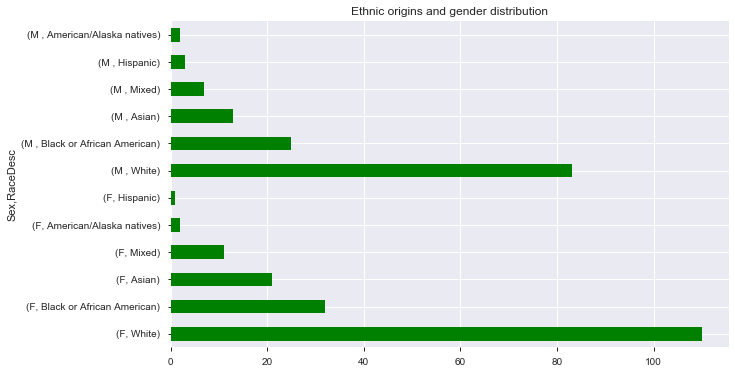

In [32]:
hr.RaceDesc.groupby(hr['Sex']).value_counts().plot(kind='barh', color='g').set_title('Ethnic origins and gender distribution');

In [33]:
hr.DateofHire.sort_values() #The first employee 'EmpCODE #31' is hired on the 9th of Jan, 2006.

31    2006-01-09
280   2007-06-25
128   2007-11-05
133   2008-01-07
117   2008-09-02
         ...    
285   2017-02-10
34    2017-02-15
286   2017-02-15
35    2017-04-20
36    2017-04-20
Name: DateofHire, Length: 310, dtype: datetime64[ns]

In [34]:
# I look at the distribution of where employees have been sourced
source = hr.RecruitmentSource.value_counts()
source

Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
MBTA ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Website Banner Ads                        13
Word of Mouth                             13
On-campus Recruiting                      12
Social Networks - Facebook Twitter etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Careerbuilder                              1
Pay Per Click                              1
Company Intranet - Partner                 1
On-line We

In [35]:
top10Source = source.sort_values(ascending = False).head(10)
top10Source

Employee Referral                    31
Diversity Job Fair                   29
Search Engine - Google Bing Yahoo    25
Monster.com                          24
Pay Per Click - Google               21
Professional Society                 20
Newspager/Magazine                   18
MBTA ads                             17
Billboard                            16
Vendor Referral                      15
Name: RecruitmentSource, dtype: int64

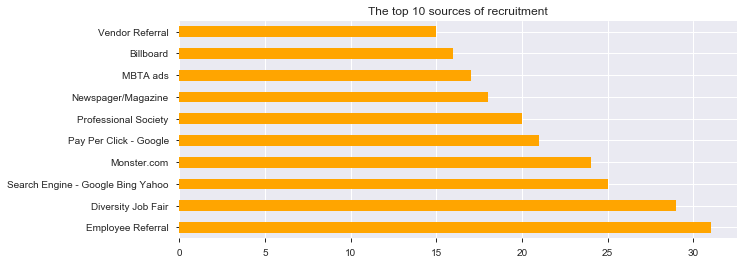

In [36]:
# I plot to the 10 first sources of recruitment
top10Source.plot(kind='barh', color='orange', figsize=(10,4)).set_title('The top 10 sources of recruitment');

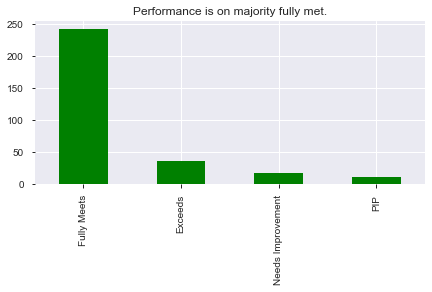

In [37]:
# I look at the overall performance score among the employees
hr['PerformanceScore'].value_counts().plot(kind='bar', color='green',figsize=(7,3))
plt.title('Performance is on majority fully met.'); #performance improvement plan : PIP

In [38]:
hr.PerformanceScore.unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement'], dtype=object)

In [39]:
# In statistics, Cramér's V is a measure of association between 2 nominal variables, giving a value between 0 and +1 (inclusive).

def cramers_corrected_stat(x,y):

    """ calculate Cramers V statistic for categorial-categorial association.
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

In [40]:
#Is there any relationship between who a person works for and their performance score?
print(cramers_corrected_stat(hr.ManagerCODE, hr.PerfScoreCODE))

0.041851


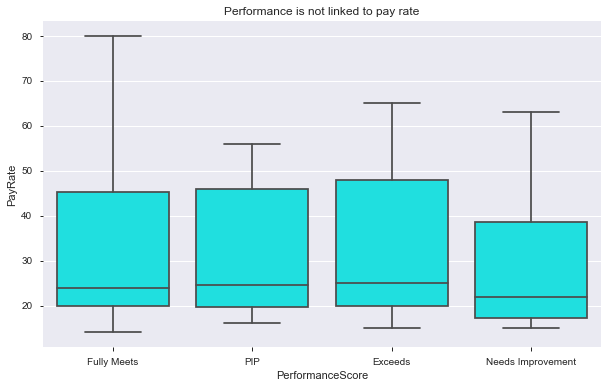

In [41]:
# Is there any relationship between a person pay rate and their performance score?
sns.boxplot(x="PerformanceScore", y="PayRate", color='cyan', data=hr).set_title('Performance is not linked to pay rate');

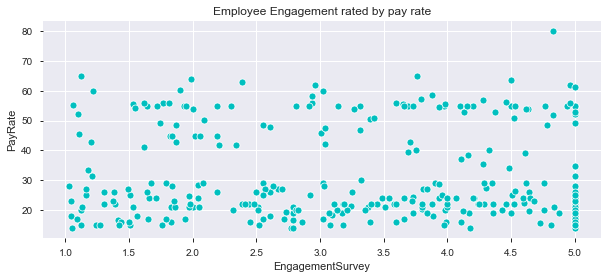

In [42]:
# I plot the pay rate and the Engagement rating
plt.rcParams['figure.figsize'] = (10,4)
sns.scatterplot(x="EngagementSurvey", y="PayRate", color='c', data=hr).set_title('Employee Engagement rated by pay rate');

Department
Production              23.086298
Admin Offices           31.896000
IT/IS                   45.789600
Software Engineering    48.665000
Sales                   55.524194
Executive Office        80.000000
Name: PayRate, dtype: float64

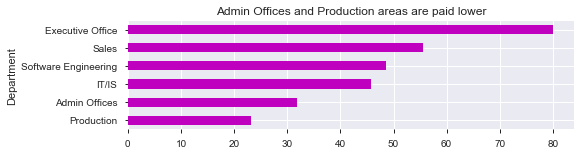

In [43]:
#Are there areas of the company where pay is not equitable?
PayRate_mean = hr["PayRate"].groupby(hr["Department"]).agg("mean").sort_values(ascending=True) 
display(PayRate_mean)
PayRate_mean.plot.barh(color='m', figsize=(8,2)).set_title('Admin Offices and Production areas are paid lower');

In [44]:
# Here is a function to calculate tenure from a date
def calculate_age(birthdayDate, today):
    if pd.isnull(birthdayDate):
        return np.nan
    else:
        return today.year - birthdayDate.year - ((today.month, today.day) < (birthdayDate.month, birthdayDate.day))

In [45]:
# I create new columns regarding age and seniority
import datetime
today = datetime.date.today()
hr['age'] = hr['DOB'].apply(lambda x: (calculate_age(x, today)))
hr['seniority'] = hr['DateofHire'].apply(lambda x: (calculate_age(x, today)))

In [46]:
# I check if ages and seniority are displayed in the new columns
hr[['DOB','age','DateofHire','seniority']]

DOB  age DateofHire  seniority
0   1987-11-24   32 2008-10-27         11
1   1984-04-26   35 2014-01-06          6
2   1986-09-01   33 2014-09-29          5
3   1985-09-16   34 2015-02-16          4
4   1988-05-19   31 2015-05-01          4
..         ...  ...        ...        ...
305 1952-01-18   67 2014-11-10          5
306 1986-04-23   33 2014-11-10          5
307 1983-02-09   36 2016-06-30          3
308 1965-09-09   54 2014-11-10          5
309 1978-05-02   41 2015-03-30          4

[310 rows x 4 columns]

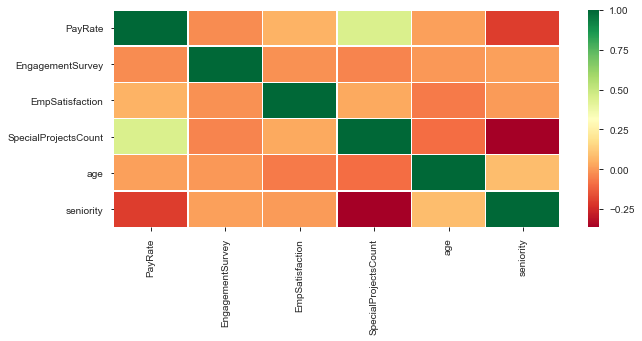

In [47]:
sns.heatmap(hr.corr(), cmap='RdYlGn', linewidth= .3);

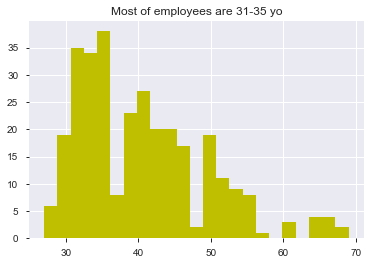

In [48]:
# I look at the age distribution
hr['age'].hist(bins = 23, color = 'y', figsize = (6,4)).set_title('Most of employees are 31-35 yo');

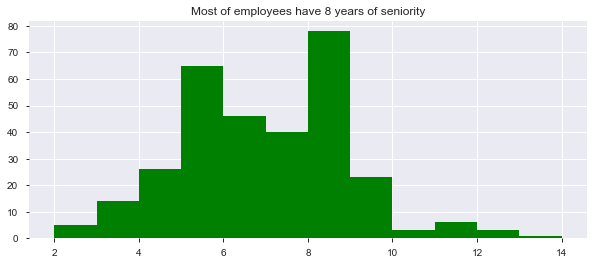

In [49]:
# I look at the seniority distribution
hr['seniority'].hist(bins = 12, color = 'g').set_title('Most of employees have 8 years of seniority');

In [50]:
# I create a feature to show attrition
hr['Attrition'] = np.where(hr['TermReason']!='N/A - still employed', 1, 0)

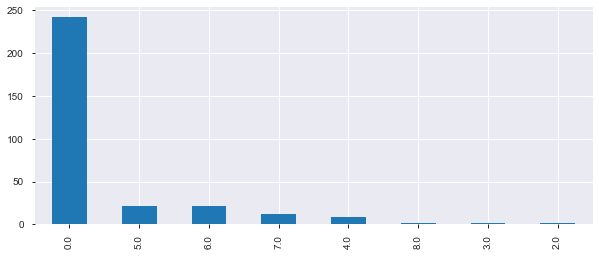

In [51]:
# As seen in the correlation matrix, now I want to focus on the correlation on SpecialProjectsCount and pay rate
# I look at the Special Projects count feature distribution
hr.SpecialProjectsCount.value_counts().plot(kind = 'bar')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB5B8BE808>,
      dtype=object)

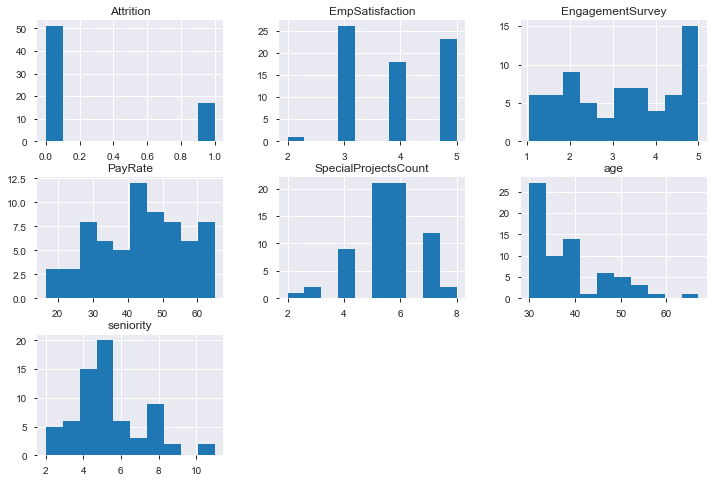

In [52]:
# I subset the dataset to collect only employes involved in special projects and look at the different distributions
special_project = hr[hr.SpecialProjectsCount != 0]
special_project.hist(figsize = (12, 8))

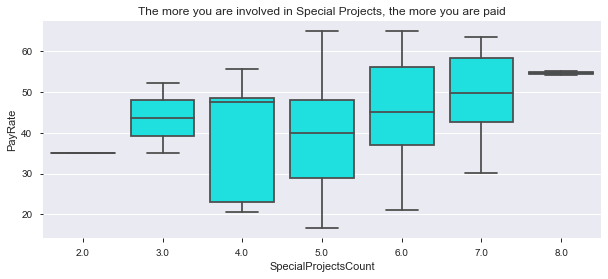

In [53]:
# I plot the employee involved in SpecialProjects and look at their pay rate
sns.boxplot(x="SpecialProjectsCount", y="PayRate", color='cyan', data=special_project).set_title('The more you are involved in Special Projects, the more you are paid');

In [54]:
# Now I want to focuss on termination reason
# I identify the values of the TermReason feature
hr.TermReason.unique()

array(['N/A - still employed', nan, 'career change', 'Another position',
       'attendance', 'relocation out of area',
       'N/A - Has not started yet', 'performance', 'no-call, no-show',
       'hours', 'medical issues', 'retiring', 'unhappy', 'more money',
       'return to school', 'gross misconduct', 'military',
       'maternity leave - did not return'], dtype=object)

In [55]:
#I subset the data of every employee in termination
Termination = hr[hr['TermReason']!='N/A - still employed'][hr['DateofTermination']!='NaT']
Termination.head()

EmpCODE MarriedCODE MaritalStatusCODE GenderCODE EmpStatusCODE  \
3   1.21105e+09           1                 1          0             1   
5   7.11008e+08           1                 1          0             5   
6   1.50407e+09           1                 1          0             5   
11  1.30205e+09           0                 4          0             4   
13  1.00117e+09           0                 0          1             5   

   DeptCODE PerfScoreCODE FromDiversityJobFairCODE  PayRate PositionCODE  ...  \
3         1             3                        0     21.5            2  ...   
5         1             3                        1     20.5            2  ...   
6         6             3                        0     55.0            3  ...   
11        6             3                        0     55.0            3  ...   
13        6             3                        0     55.0            3  ...   

   ManagerCODE                       RecruitmentSource PerformanceScore  \
3            1                  Pay Per Click - Google      Fully Meets   
5            1                      Diversity Job Fair      Fully Meets   
6           17  Social Networks - Facebook Twitter etc      Fully Meets   
11          17                             Monster.com      Fully Meets   
13          17                      Newspager/Magazine      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
3              3.24             3.0                  4.0   
5              3.80             4.0                  4.0   
6              3.14             5.0                  0.0   
11             3.97             4.0                  0.0   
13             4.50             5.0                  0.0   

   LastPerformanceReview_Date age seniority Attrition  
3                         NaT  34         4         1  
5                         NaT  32         8         1  
6                         NaT  55         8         1  
11                        NaT  48         5         1  
13                        NaT  50         8         1  

[5 rows x 33 columns]

count    114.000000
mean      27.535702
std       12.840598
min       14.000000
25%       19.750000
50%       23.000000
75%       29.000000
max       62.000000
Name: PayRate, dtype: float64

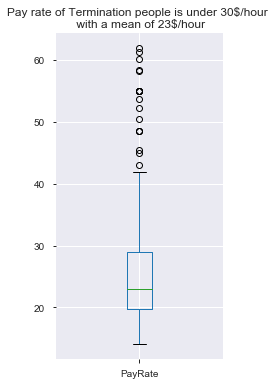

In [56]:
# I look at the pay rate of employees who terminated
Termination.boxplot(column = 'PayRate',figsize=(3,6)).set_title('Pay rate of Termination people is under 30$/hour \n with a mean of 23$/hour');
Termination.PayRate.describe()

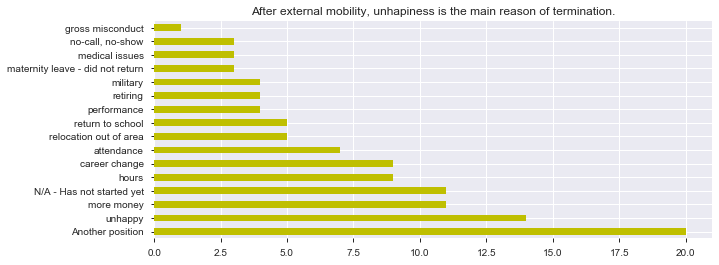

In [57]:
# I look at the distribution of TermReason feature values
Termination.TermReason.value_counts().plot(kind='barh', color='y', figsize=(10,4))
plt.title('After external mobility, unhapiness is the main reason of termination.');

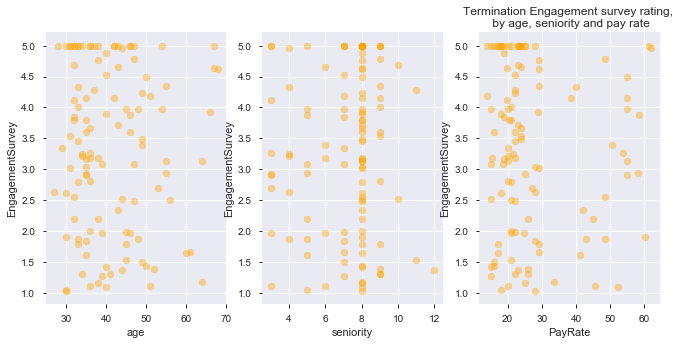

In [58]:
# I plot the Engagement rate by age, seniority and pay rate
cols=['age','seniority','PayRate','EngagementSurvey']
df=Termination[cols]
fig,axes = plt.subplots(figsize = (11,5), nrows = 1, ncols = 3)
for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i],Termination['EngagementSurvey'], alpha = 0.4, color = 'orange')
    plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('EngagementSurvey')
plt.title('Termination Engagement survey rating, \n by age, seniority and pay rate');

In [ ]:
# Most employees who terminated have had 8-year seniority, were paid under 30€/hour and from all ages.

max       mean  median   min  \
Sex RaceDesc                                                    
F   Asian                      28.00  22.214286    22.0  19.0   
    Black or African American  61.30  39.537500    41.0  14.0   
    Hispanic                   17.00  17.000000    17.0  17.0   
    Mixed                      23.00  18.300000    18.5  15.0   
    White                      60.25  24.760638    22.0  14.0   
M   Asian                      53.80  44.110000    50.5  22.0   
    Black or African American  58.20  33.520000    29.0  15.0   
    Mixed                      55.00  43.666667    55.0  21.0   
    White                      62.00  24.990741    22.0  15.0   

                                             std  
Sex RaceDesc                                      
F   Asian                                3.28959  
    Black or African American            17.7823  
    Hispanic                   only one employee  
    Mixed                                3.11448  
    White                                9.91279  
M   Asian                                13.1747  
    Black or African American            15.8611  
    Mixed                                19.6299  
    White                                10.4524

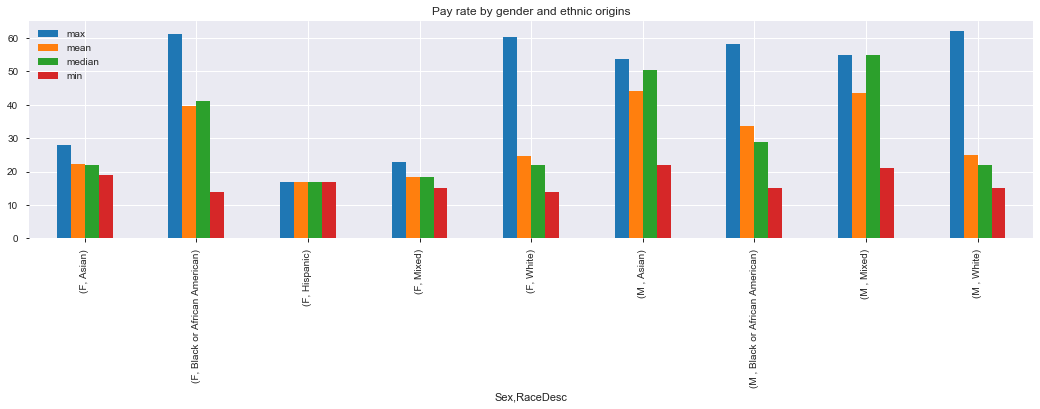

In [59]:
# I look at pay rate by ethnic origins and gender
table1 = pd.pivot_table(Termination, index = ['Sex', 'RaceDesc'], values = 'PayRate', aggfunc={'PayRate': [np.median, np.mean, min, max, np.std]}, fill_value='only one employee')
display(table1)
table1.plot(kind='bar', figsize = (18,4)).set_title('Pay rate by gender and ethnic origins');

max       mean  median    min                std
Department           Sex                                                    
Admin Offices        F    21.50  21.000000  21.000  20.50           0.707107
                     M    55.00  55.000000  55.000  55.00  only one employee
IT/IS                F    61.30  52.825000  53.500  43.00            8.54922
                     M    62.00  43.637500  43.000  21.00             14.297
Production           F    38.50  21.931034  21.500  14.00            4.92705
                     M    50.50  23.734848  22.000  15.00            8.60413
Sales                F    60.25  56.750000  55.000  55.00            3.03109
                     M    55.00  55.000000  55.000  55.00                  0
Software Engineering F    48.50  48.500000  48.500  48.50  only one employee
                     M    52.25  48.835000  48.835  45.42            4.82954

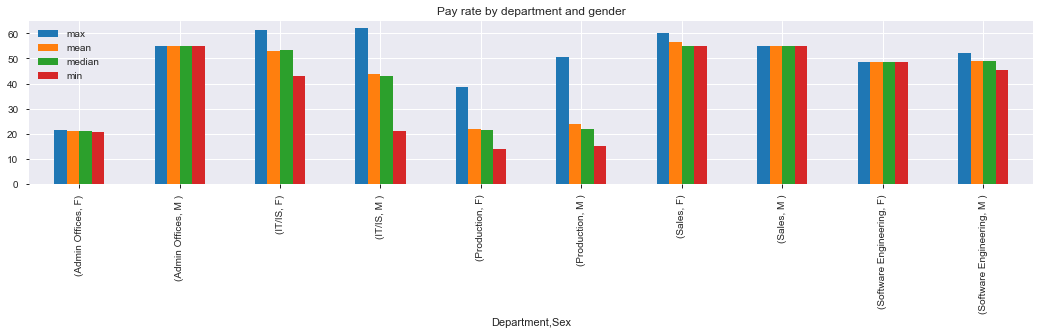

In [60]:
# I look at pay rate by department and gender
table2 = pd.pivot_table(Termination, index=['Department','Sex'], values='PayRate', aggfunc={'PayRate':[np.median, np.mean, min, max, np.std]}, fill_value='only one employee')
display(table2)
table2.plot(kind='bar', figsize=(18,3)).set_title('Pay rate by department and gender');

RecruitmentSource                       RaceDesc                   GenderCODE
Search Engine - Google Bing Yahoo       White                      0.0           10
Monster.com                             White                      0.0            6
Diversity Job Fair                      Black or African American  1.0            5
Social Networks - Facebook Twitter etc  White                      0.0            4
Employee Referral                       White                      1.0            4
                                                                                 ..
Newspager/Magazine                      White                      1.0            1
                                        Mixed                      1.0            1
                                        Asian                      0.0            1
Monster.com                             Black or African American  0.0            1
Billboard                               Asian                      1.0            

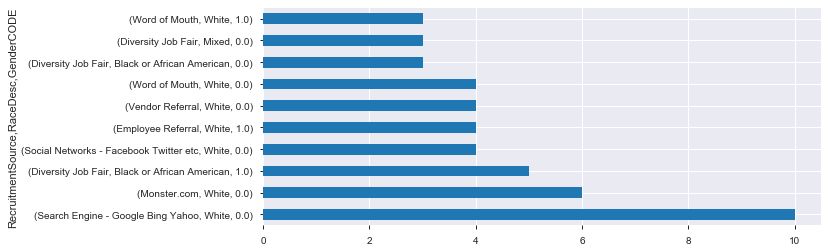

In [61]:
# I look at the gender and origin of people recruited for the top 10 sources
table3= Termination.groupby(['RecruitmentSource','RaceDesc'])
table3 = table3.GenderCODE.value_counts().sort_values(ascending = False)
display(table3)
table3.head(10).plot(kind ='barh');

In [62]:
# I look at the pay rate means by position
display(hr.Position.value_counts(ascending = True))

table5 = pd.pivot_table(hr, index = ['Department','Position'], values = ['PayRate'], 
                        aggfunc={'PayRate':[np.median, np.mean, min, max, np.std]}, fill_value='only one employee')
display(table5)

President & CEO                   1
Director of Operations            1
Principal Data Architect          1
Enterprise Architect              1
Director of Sales                 1
IT Manager - Support              1
CIO                               1
IT Director                       1
BI Director                       1
Data Architect                    1
IT Manager - Infra                1
Software Engineering Manager      1
IT Manager - DB                   2
Sr. Accountant                    2
Shared Services Manager           2
Sr. DBA                           2
Senior BI Developer               3
Accountant I                      3
Sales Manager                     3
Administrative Assistant          3
BI Developer                      4
Database Administrator            5
Sr. Network Engineer              5
Network Engineer                  5
IT Support                        8
Data Analyst                      8
Software Engineer                 9
Production Manager          

PayRate                     \
                                                      max       mean  median   
Department           Position                                                  
Admin Offices        Accountant I                   29.00  26.833333  28.500   
                     Administrative Assistant       21.50  19.520000  20.500   
                     Shared Services Manager        55.00  55.000000  55.000   
                     Sr. Accountant                 34.95  34.950000  34.950   
Executive Office     President & CEO                80.00  80.000000  80.000   
IT/IS                BI Developer                   46.00  45.250000  45.000   
                     BI Director                    63.50  63.500000  63.500   
                     CIO                            65.00  65.000000  65.000   
                     Data Analyst                   45.00  38.450000  40.275   
                     Data Architect                 55.00  55.000000  55.000   
                     Database Administrator         48.50  41.120000  40.100   
                     Enterprise Architect           58.20  58.200000  58.200   
                     IT Director                    65.00  65.000000  65.000   
                     IT Manager - DB                62.00  41.500000  41.500   
                     IT Manager - Infra             63.00  63.000000  63.000   
                     IT Manager - Support           64.00  64.000000  64.000   
                     IT Support                     45.00  34.610000  34.200   
                     Network Engineer               49.10  38.820000  43.000   
                     Principal Data Architect       58.50  58.500000  58.500   
                     Senior BI Developer            52.25  51.166667  51.000   
                     Sr. DBA                        62.00  61.650000  61.650   
                     Sr. Network Engineer           56.20  54.460000  54.100   
Production           Director of Operations         60.00  60.000000  60.000   
                     Production Manager             55.00  49.678571  52.500   
                     Production Technician I        24.75  19.104485  19.250   
                     Production Technician II       29.00  25.407719  25.000   
Sales                Area Sales Manager             57.00  55.222222  55.000   
                     Director of Sales              60.00  60.000000  60.000   
                     Sales Manager                  60.25  56.750000  56.000   
Software Engineering Software Engineer              57.12  51.072222  49.250   
                     Software Engineering Manager   27.00  27.000000  27.000   

                                                                             
                                                     min                std  
Department           Position                                                
Admin Offices        Accountant I                  23.00            3.32916  
                     Administrative Assistant      16.56            2.61174  
                     Shared Services Manager       55.00                  0  
                     Sr. Accountant                34.95                  0  
Executive Office     President & CEO               80.00  only one employee  
IT/IS                BI Developer                  45.00                0.5  
                     BI Director                   63.50  only one employee  
                     CIO                           65.00  only one employee  
                     Data Analyst                  30.20            5.47246  
                     Data Architect                55.00  only one employee  
                     Database Administrator        34.00            5.26754  
                     Enterprise Architect          58.20  only one employee  
                     IT Director                   65.00  only one employee  
                     IT Manager - DB               21.00            28.9914  
   

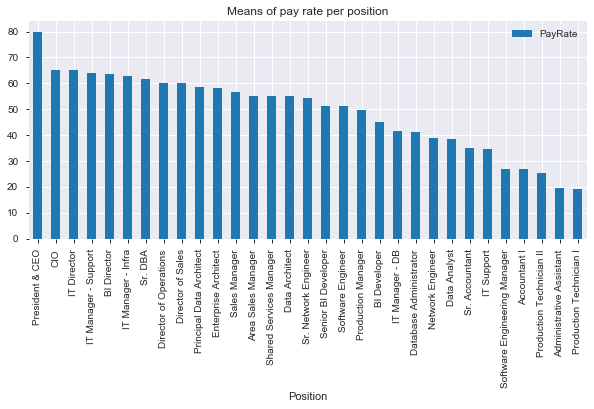

In [63]:
Position_mean = hr[["Position", "PayRate"]].groupby(["Position"]).agg("mean").sort_values(by=['PayRate'], ascending = False)
Position_mean.plot.bar().set_title('Means of pay rate per position');

In [64]:
# I generate and plot a survival function that shows how employee retention rates vary by feature.

def survival(data, group_field, time_field, event_field):
    kmf = KaplanMeierFitter()
    results = []

    for i in data[group_field].unique():
        group = data[data[group_field]==i]
        T = group[time_field]
        E = group[event_field]
        kmf.fit(T, E, label=str(i))
        results.append(kmf.survival_function_)

    survival = pd.concat(results, axis=1)
    front_fill = survival.fillna(method='ffill')
    back_fill = survival.fillna(method='bfill')
    smoothed = (front_fill + back_fill) / 2
    return smoothed

In [65]:
Attrition = survival(hr, 'Sex','age','Attrition')
Attrition.iplot(kind='line', xTitle='Tenure (Age)', yTitle='Attrition Rate',
            title='Retention rates by gender and employee age')

In [66]:
Attrition = survival(hr, 'Sex','seniority','Attrition')
Attrition.iplot(kind='line', xTitle='Tenure (Years at Company)', yTitle='Attrition Rate',
            title='Retention rates by gender and Seniority')

In [67]:
Attrition = survival(hr,'MaritalDesc','seniority','Attrition')
Attrition.iplot(kind='line', xTitle='Tenure(YearsAtCompany)', yTitle='Attrition Rate',
            title='Retention rates by Marital Status and Seniority')

In [68]:
Attrition = survival(hr,'MaritalDesc','age','Attrition')
Attrition.iplot(kind='line', xTitle='Tenure(Age)', yTitle='Attrition Rate',
            title='Retention rates by Marital Status and Age')

In [69]:
Attrition = survival(hr,'EmpSatisfaction','seniority','Attrition')
Attrition.iplot(kind='line', xTitle='Tenure(Years at Company)', yTitle='Attrition Rate',
            title='Retention rates by Employement satisfaction and Seniority')

In [70]:
hr['PayGrade'] = pd.qcut(hr['PayRate'], 5, labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High'])
rates = survival(hr, 'PayGrade', 'age', 'Attrition')
rates.iplot(kind='line', xTitle='age', yTitle='Retention', title='Retention Rates by Age and Pay Grade')

In [71]:
# I subset some data to identify which variables are correlated the most with the attrition
cox_data = hr[['age','PayRate','GenderCODE','MarriedCODE','PerfScoreCODE','EngagementSurvey','SpecialProjectsCount','seniority', 'Attrition']]

coef  exp(coef)  se(coef)  coef lower 95%  \
age                   0.010584   1.010640  0.010873       -0.010727   
PayRate              -0.015491   0.984628  0.007756       -0.030692   
GenderCODE            0.086332   1.090168  0.195918       -0.297661   
MarriedCODE           0.078936   1.082135  0.191546       -0.296487   
PerfScoreCODE        -0.210807   0.809931  0.154054       -0.512748   
EngagementSurvey     -0.016807   0.983334  0.072831       -0.159553   
SpecialProjectsCount  0.070702   1.073261  0.053867       -0.034875   

                      coef upper 95%  exp(coef) lower 95%  \
age                         0.031895             0.989331   
PayRate                    -0.000290             0.969774   
GenderCODE                  0.470324             0.742553   
MarriedCODE                 0.454359             0.743426   
PerfScoreCODE               0.091134             0.598848   
EngagementSurvey            0.125939             0.852525   
SpecialProjectsCount        0.176278             0.965726   

                      exp(coef) upper 95%         z         p  -log2(p)  
age                              1.032409  0.973429  0.330340  1.597977  
PayRate                          0.999710 -1.997395  0.045782  4.449066  
GenderCODE                       1.600513  0.440652  0.659465  0.600632  
MarriedCODE                      1.575163  0.412100  0.680266  0.555829  
PerfScoreCODE                    1.095416 -1.368392  0.171189  2.546334  
EngagementSurvey                 1.134213 -0.230764  0.817498  0.290713  
SpecialProjectsCount             1.192770  1.312533  0.189340  2.400947

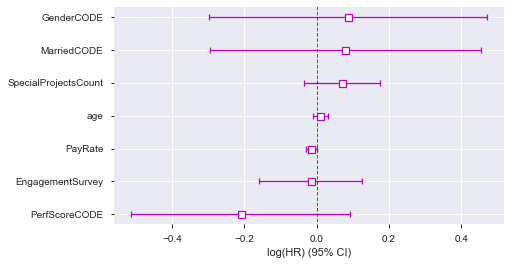

In [72]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(cox_data, duration_col='seniority', event_col='Attrition')
display(cph.summary)
plt.rcParams['figure.figsize'] = (7,4)
cph.plot(c = 'm');

In [73]:
# Store the clean data set in Tableau here: https://public.tableau.com/profile/morgane.berilhe.tuy#!/vizhome/HRproject/Story1
hr.to_csv('clean_HR.csv', index=False)

In [74]:
hr = pd.read_csv('clean_HR.csv')

# Machine Learning processing

In [ ]:
# My question is : Can we predict among employees of 8_year seniority and +, still in the company who is going to voluntarily terminate and who isn't? 
# What level of accuracy can we achieve on this? 

In [75]:
hr_ml = pd.read_csv('clean_HR.csv') #insérer ici la "ML version"

In [ ]:
hr_ml[['PerfScoreCODE', 'PerformanceScore']].groupby(['PerfScoreCODE']).min()

In [ ]:
hr_ml[['MarriedCODE', 'MaritalStatusCODE']].groupby(['MaritalStatusCODE']).min()

In [ ]:
#hr_ml.MarriedCODE.hist()

In [ ]:
hr_ml[['MaritalDesc', 'MaritalStatusCODE']].groupby(['MaritalStatusCODE']).min()

In [ ]:
hr_ml[['GenderCODE', 'Sex']].groupby(['GenderCODE']).min()

In [ ]:
hr_ml[['RecruitmentSource', 'FromDiversityJobFairCODE']].groupby(['RecruitmentSource']).sum()

In [ ]:
hr_ml[['PositionCODE', 'Position']].groupby(['PositionCODE']).min()

In [ ]:
hr_ml[['DeptCODE', 'Department']].groupby(['DeptCODE']).min()

In [ ]:
hr_ml.EmploymentStatus.value_counts()

In [ ]:
hr_ml.EmpStatusCODE.value_counts()

In [ ]:
hr_ml.head()

# Feature selection/engineering

In [76]:
# I create a feature to inform if the employee has less or more than 8 years of seniority
hr_ml['+8_years'] = np.where( ((hr_ml['seniority'] >= 8)), 1, 0)
hr_ml['+8_years'].value_counts() # 1/3 of the staff have 8 years of seniority

0    196
1    114
Name: +8_years, dtype: int64

In [77]:
hr_ml.drop(columns = ['EmpCODE', 'MarriedCODE', 'MaritalStatusCODE', 'GenderCODE',
       'EmpStatusCODE', 'DeptCODE', 'PerfScoreCODE','State', 
       'FromDiversityJobFairCODE', 'PositionCODE', 'Zip', 'DOB', 'CitizenDesc', 'DateofHire', 'DateofTermination',
       'TermReason', 'EmploymentStatus', 'ManagerCODE', 'Position',
       'RecruitmentSource', 'EmpSatisfaction', 'LastPerformanceReview_Date','PayGrade'], inplace = True)

In [78]:
# get_dummies on numerical categorical variables 
hr_ml = pd.get_dummies(data=hr_ml, columns=['Sex', 'MaritalDesc', 'PerformanceScore', 'Department', 'RaceDesc', 'SpecialProjectsCount'], drop_first= True)
hr_ml.columns

Index(['PayRate', 'EngagementSurvey', 'age', 'seniority', 'Attrition',
       '+8_years', 'Sex_M ', 'MaritalDesc_Married', 'MaritalDesc_Separated',
       'MaritalDesc_Single', 'MaritalDesc_Widowed',
       'PerformanceScore_Fully Meets', 'PerformanceScore_Needs Improvement',
       'PerformanceScore_PIP', 'Department_Executive Office',
       'Department_IT/IS', 'Department_Production', 'Department_Sales',
       'Department_Software Engineering', 'RaceDesc_Asian',
       'RaceDesc_Black or African American', 'RaceDesc_Hispanic',
       'RaceDesc_Mixed', 'RaceDesc_White', 'SpecialProjectsCount_2.0',
       'SpecialProjectsCount_3.0', 'SpecialProjectsCount_4.0',
       'SpecialProjectsCount_5.0', 'SpecialProjectsCount_6.0',
       'SpecialProjectsCount_7.0', 'SpecialProjectsCount_8.0'],
      dtype='object')

In [79]:
from sklearn.preprocessing import minmax_scale
hr_ml[['age','PayRate','seniority','EngagementSurvey']] = minmax_scale(hr_ml[['age','PayRate','seniority','EngagementSurvey']])

In [80]:
#=> I exclude from my dataset, staff still employed who have not 8_year seniority
(((hr_ml['+8_years'] == 1) & (hr_ml['Attrition'] == 0)) | (hr_ml['Attrition'] == 1)).value_counts()

True     157
False    153
dtype: int64

In [81]:
# I create the final dataset to process Machine Learning
final = hr_ml[(((hr_ml['+8_years'] == 1) & (hr_ml['Attrition'] == 0)) | (hr_ml['Attrition'] == 1))]

In [82]:
final.columns

Index(['PayRate', 'EngagementSurvey', 'age', 'seniority', 'Attrition',
       '+8_years', 'Sex_M ', 'MaritalDesc_Married', 'MaritalDesc_Separated',
       'MaritalDesc_Single', 'MaritalDesc_Widowed',
       'PerformanceScore_Fully Meets', 'PerformanceScore_Needs Improvement',
       'PerformanceScore_PIP', 'Department_Executive Office',
       'Department_IT/IS', 'Department_Production', 'Department_Sales',
       'Department_Software Engineering', 'RaceDesc_Asian',
       'RaceDesc_Black or African American', 'RaceDesc_Hispanic',
       'RaceDesc_Mixed', 'RaceDesc_White', 'SpecialProjectsCount_2.0',
       'SpecialProjectsCount_3.0', 'SpecialProjectsCount_4.0',
       'SpecialProjectsCount_5.0', 'SpecialProjectsCount_6.0',
       'SpecialProjectsCount_7.0', 'SpecialProjectsCount_8.0'],
      dtype='object')

In [83]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 307
Data columns (total 31 columns):
PayRate                               157 non-null float64
EngagementSurvey                      157 non-null float64
age                                   157 non-null float64
seniority                             157 non-null float64
Attrition                             157 non-null int64
+8_years                              157 non-null int32
Sex_M                                 157 non-null uint8
MaritalDesc_Married                   157 non-null uint8
MaritalDesc_Separated                 157 non-null uint8
MaritalDesc_Single                    157 non-null uint8
MaritalDesc_Widowed                   157 non-null uint8
PerformanceScore_Fully Meets          157 non-null uint8
PerformanceScore_Needs Improvement    157 non-null uint8
PerformanceScore_PIP                  157 non-null uint8
Department_Executive Office           157 non-null uint8
Department_IT/IS                

In [84]:
# I look at the distribution of classes in the Target : 'Attrition'
final.Attrition.value_counts()
# print(final.groupby('Attrition').size())

1    114
0     43
Name: Attrition, dtype: int64

In [85]:
final.head()

PayRate  EngagementSurvey       age  seniority  Attrition  +8_years  \
0   0.219697          0.254408  0.119048   0.750000          0         1   
3   0.113636          0.556675  0.166667   0.166667          1         0   
5   0.098485          0.697733  0.119048   0.500000          1         1   
6   0.621212          0.531486  0.666667   0.500000          1         1   
10  0.628788          0.659950  0.547619   0.500000          0         1   

    Sex_M   MaritalDesc_Married  MaritalDesc_Separated  MaritalDesc_Single  \
0        0                    1                      0                   0   
3        0                    1                      0                   0   
5        0                    1                      0                   0   
6        0                    1                      0                   0   
10       1                    0                      0                   1   

    ...  RaceDesc_Hispanic  RaceDesc_Mixed  RaceDesc_White  \
0   ...                  0               0               0   
3   ...                  0               0               1   
5   ...                  0               0               0   
6   ...                  0               0               0   
10  ...                  0               1               0   

    SpecialProjectsCount_2.0  SpecialProjectsCount_3.0  \
0                          0                         0   
3                          0                         0   
5                          0                         0   
6                          0                         0   
10                         0                         0   

    SpecialProjectsCount_4.0  SpecialProjectsCount_5.0  \
0                          0                         0   
3                          1                         0   
5                          1                         0   
6                          0                         0   
10                         0                         0   

    SpecialProjectsCount_6.0  SpecialProjectsCount_7.0  \
0                          1                         0   
3                          0                         0   
5                          0                         0   
6                          0                         0   
10                         0                         0   

    SpecialProjectsCount_8.0  
0                          0  
3                          0  
5                          0  
6                          0  
10                         0  

[5 rows x 31 columns]

# Split the dataset

In [86]:
x_columns = [col for col in final.columns.values if col != "Attrition"]
final_variables = final[x_columns]

X, y = final[x_columns], final.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((125, 30), (32, 30), (125,), (32,))

# Train models

In [88]:

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    #We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.768590 (0.081662)
LDA: 0.784615 (0.086012)
KNN: 0.726923 (0.119692)
DTC: 0.737179 (0.102924)
RFC: 0.719872 (0.074262)
NB: 0.569231 (0.078969)
SVM: 0.721154 (0.028846)


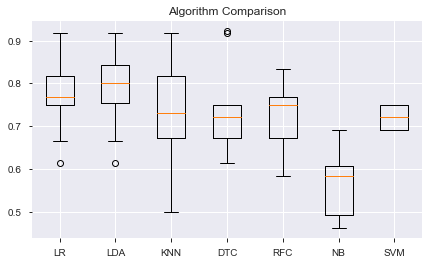

In [89]:
# Compare Algorithms
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [ ]:
# The KNN model seems to perform the best.
# We can fit the model on the entire training dataset and make predictions on the test dataset.

In [90]:
# I look at the feature importance

clf = RandomForestClassifier()
clf.fit(final_variables, final.Attrition) # targets/labels

#print(len(clf.feature_importances_))
#print(len(x_columns))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

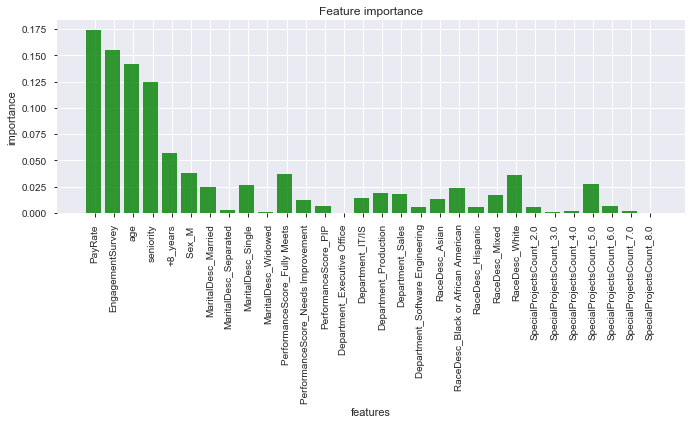

In [91]:
#I plot the feature importance
plt.figure(figsize=(6 * 1.618, 6))
index = np.arange(len(x_columns))

bar_width = 0.1
plt.bar(index, clf.feature_importances_, color='green', alpha=0.8)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Feature importance')
plt.xticks(index + bar_width, x_columns, rotation = 90)
plt.tight_layout()
plt.show()

In [92]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1] - 1) :
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.174553)
2. feature 1 (0.155427)
3. feature 2 (0.141886)
4. feature 3 (0.124414)
5. feature 4 (0.057138)
6. feature 5 (0.037820)
7. feature 10 (0.037387)
8. feature 22 (0.036530)
9. feature 26 (0.027560)
10. feature 8 (0.026586)
11. feature 6 (0.024602)
12. feature 19 (0.023928)
13. feature 15 (0.018635)
14. feature 16 (0.017681)
15. feature 21 (0.017151)
16. feature 14 (0.014671)
17. feature 18 (0.012868)
18. feature 11 (0.012292)
19. feature 27 (0.006607)
20. feature 12 (0.006322)
21. feature 23 (0.006028)
22. feature 20 (0.005508)
23. feature 17 (0.005342)
24. feature 7 (0.003100)
25. feature 28 (0.002190)
26. feature 25 (0.002189)
27. feature 9 (0.000843)
28. feature 24 (0.000742)
29. feature 13 (0.000000)


# Make predictions on test dataset

In [93]:
from sklearn.preprocessing import RobustScaler 

# I scale the dataset then fit my selected model
scaler = RobustScaler() 
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

scaled_model = LinearDiscriminantAnalysis()
scaled_model.fit(X_train_transformed, y_train)
y_pred = scaled_model.predict(X_test_transformed)

# Evaluation

In [94]:
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred)) 

[[ 4  4]
 [ 3 21]]
Accuracy: 0.78125
              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.84      0.88      0.86        24

    accuracy                           0.78        32
   macro avg       0.71      0.69      0.70        32
weighted avg       0.77      0.78      0.78        32



In [95]:
class_names = list(final.Attrition.unique())

def print_confusion_matrix(confusion_matrix, class_names, figsize = (6,5), fontsize=15):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap = 'RdYlGn')
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return 'My awesome confusion matrix !'

Accuracy: 0.78125


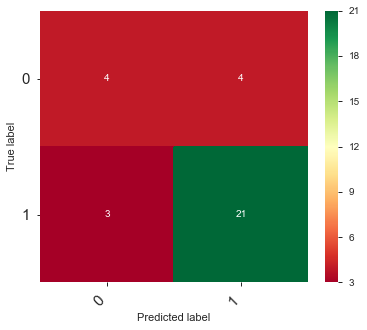

In [96]:
print_confusion_matrix(confusion_matrix(y_test, y_pred), class_names)
print("Accuracy:", accuracy_score(y_test, y_pred))

In [97]:
final.Attrition.value_counts() / final.shape[0]

1    0.726115
0    0.273885
Name: Attrition, dtype: float64

In [98]:
# Just to check, I train models on the test set.

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.716667 (0.179505)
LDA: 0.675000 (0.259406)
KNN: 0.666667 (0.226691)
DTC: 0.508333 (0.168531)
RFC: 0.750000 (0.129099)
NB: 0.491667 (0.168531)
SVM: 0.750000 (0.129099)


In [ ]:
# I try to optimize the prediction by oversampling with SMOTE

In [99]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 90
Before OverSampling, counts of label '0': 35 

After OverSampling, the shape of X_train: (180, 30)
After OverSampling, the shape of y_train: (180,) 

After OverSampling, counts of label '1': 90
After OverSampling, counts of label '0': 90


In [100]:
smote_model = LinearDiscriminantAnalysis()
smote_model.fit(X_train_res, y_train_res.ravel())
smote_y_pred = smote_model.predict(X_test)

In [101]:
# print classification report 
print(classification_report(y_test, smote_y_pred))

              precision    recall  f1-score   support

           0       0.42      0.62      0.50         8
           1       0.85      0.71      0.77        24

    accuracy                           0.69        32
   macro avg       0.63      0.67      0.64        32
weighted avg       0.74      0.69      0.70        32



Accuracy after oversampling: 0.6875


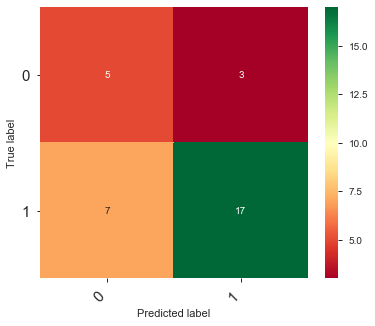

In [102]:
print_confusion_matrix(confusion_matrix(y_test, smote_y_pred), class_names)
print("Accuracy after oversampling:", accuracy_score(y_test, smote_y_pred))